<a href="https://colab.research.google.com/github/nohjuhyeon/study_data_analytics/blob/main/docs/quests/CDAs/CDA_mixed_unVar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글 폰트 설치

In [1]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## matplotlib 시각화

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## load dataset

In [3]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
df_fruit = pd.read_csv("/content/fruitstore_saleshistory.csv")
df_fruit['구매일자'] = df_fruit['공급일자'].astype(str) +' '+ df_fruit['구매시각']
df_fruit[:2]

,공급일자,요일,공급월,공급주차,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,...,주소-구,주소-동,성별,연령,연령대,구매금액,구매매장,반품_원거래일자,구매시각,구매일자
0,2018-01-02,화,1,1,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),...,수지구,풍덕천동,여,45.0,40대,22207,매장C,NaN,10:04,2018-01-02 10:04
1,2018-01-02,화,1,1,1506656256,정상회원,채소,버섯,느타리버섯,느타리버섯(300g),...,수지구,풍덕천동,여,36.0,30대이하,4977,매장C,NaN,10:05,2018-01-02 10:05


In [4]:
df_fruit.isnull().sum()

공급일자             0
요일               0
공급월              0
공급주차             0
회원번호             0
조합원상태            0
물품대분류            0
물품중분류            0
물품소분류            0
물품명              0
구매수량             0
주소-구             0
주소-동             0
성별               5
연령              33
연령대             33
구매금액             0
구매매장             0
반품_원거래일자    694337
구매시각             0
구매일자             0
dtype: int64

In [5]:
df_fruit = df_fruit.dropna(subset=['연령대'])
df_fruit.isnull().sum()

공급일자             0
요일               0
공급월              0
공급주차             0
회원번호             0
조합원상태            0
물품대분류            0
물품중분류            0
물품소분류            0
물품명              0
구매수량             0
주소-구             0
주소-동             0
성별               5
연령               0
연령대              0
구매금액             0
구매매장             0
반품_원거래일자    694304
구매시각             0
구매일자             0
dtype: int64

In [6]:
df_fruit_order_frequency = df_fruit.drop_duplicates(subset=['구매일자','회원번호'], keep='first')
df_fruit_order_frequency.sort_values(by='회원번호')
df_fruit_order_frequency

,공급일자,요일,공급월,공급주차,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,...,주소-구,주소-동,성별,연령,연령대,구매금액,구매매장,반품_원거래일자,구매시각,구매일자
0,2018-01-02,화,1,1,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),...,수지구,풍덕천동,여,45.0,40대,22207,매장C,NaN,10:04,2018-01-02 10:04
1,2018-01-02,화,1,1,1506656256,정상회원,채소,버섯,느타리버섯,느타리버섯(300g),...,수지구,풍덕천동,여,36.0,30대이하,4977,매장C,NaN,10:05,2018-01-02 10:05
3,2018-01-02,화,1,1,1023108864,정상회원,반찬,두부/유부,두부,연두부(100g),...,수지구,풍덕천동,여,36.0,30대이하,766,매장C,NaN,10:08,2018-01-02 10:08
4,2018-01-02,화,1,1,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,...,수지구,풍덕천동,여,34.0,30대이하,4403,매장C,NaN,10:09,2018-01-02 10:09
5,2018-01-02,화,1,1,716128320,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),...,수지구,풍덕천동,여,51.0,50대,7083,매장C,NaN,10:10,2018-01-02 10:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705354,2018-06-30,토,6,26,1553271552,정상회원,과실,과일,황매실,황매실(남고)/유(5kg),...,수지구,신봉동,여,45.0,40대,111036,매장D,NaN,12:49,2018-06-30 12:49
705415,2018-06-30,토,6,26,1515509376,정상회원,축산물,알,유정란,유정란/매장용(15알/국내산),...,수지구,상현동,여,73.0,70대이상,10338,매장B,NaN,11:43,2018-06-30 11:43
705429,2018-06-30,토,6,26,606984384,정상회원,과실,과일,산딸기,냉동산딸기(250g),...,수지구,풍덕천동,여,51.0,50대,35608,매장B,NaN,19:34,2018-06-30 19:34
705469,2018-06-30,토,6,26,639109888,정상회원,주곡,멥쌀,멥쌀,백미/유(8kg)-매장용,...,수지구,풍덕천동,여,40.0,40대,58773,매장B,NaN,15:49,2018-06-30 15:49


In [7]:
df_fruit_order_frequency.isnull().sum()

공급일자             0
요일               0
공급월              0
공급주차             0
회원번호             0
조합원상태            0
물품대분류            0
물품중분류            0
물품소분류            0
물품명              0
구매수량             0
주소-구             0
주소-동             0
성별               1
연령               0
연령대              0
구매금액             0
구매매장             0
반품_원거래일자    143925
구매시각             0
구매일자             0
dtype: int64

In [8]:
df_fruit_user_id = df_fruit.drop_duplicates(subset=['회원번호'], keep='first')
df_fruit_user_id=df_fruit_user_id.sort_values(by='회원번호')
df_fruit_user_id_pivot = pd.pivot_table(data = df_fruit_user_id, index='회원번호',values=['연령대'], aggfunc='sum')
df_fruit_user_id_pivot= df_fruit_user_id_pivot.sort_values(by='회원번호')
df_fruit_user_id_pivot

,연령대
회원번호,
18764160,70대이상
18792000,70대이상
18942336,40대
19391488,60대
19627200,50대
...,...
1607535424,30대이하
1607672768,30대이하
1670400000,30대이하


In [9]:
df_fruit_order_frequency_pivot = pd.pivot_table(data = df_fruit_order_frequency, index='회원번호',values=['구매일자'], aggfunc='count')
df_fruit_order_frequency_pivot = df_fruit_order_frequency_pivot.sort_values(by='회원번호')
df_fruit_order_frequency_pivot

,구매일자
회원번호,
18764160,16
18792000,1
18942336,7
19391488,1
19627200,53
...,...
1607535424,1
1607672768,1
1670400000,1608


In [10]:
df_fruit_pivot_table = pd.concat([df_fruit_order_frequency_pivot, df_fruit_user_id_pivot], axis=1)
df_fruit_pivot_table = df_fruit_pivot_table.rename(columns={'구매일자': '구매빈도'})
df_fruit_pivot_table.sort_values('구매빈도',ascending=False)

,구매빈도,연령대
회원번호,,
1670400000,1608,30대이하
762476352,229,50대
389065856,214,50대
86983296,208,50대
38959296,205,50대
...,...,...
108013632,1,70대이상
1275782848,1,30대이하
825964544,1,30대이하


In [11]:
df_fruit_pivot_table.isnull().sum()

구매빈도    0
연령대     0
dtype: int64

## 회원의 연령대(범주형)에 따라 구매 빈도(연속형)의 분산이 동일한지 검증합니다.
   - 연령대별 구매 빈도의 등분산성을 검증하기 위해 Levene의 등분산 검정을 사용합니다.


## 분석 내용 : 연령대에 따른 고객의 구매 빈도의 차이가 있는가
- 귀무 가설 : 연령대에 따른 고객의 구매 빈도가 차이가 없다.
- 대립 가설 : 연령대에 따른 고객의 구매 금액의 차이가 있다.

## 정규분포 확인 : 연속형
- 구매빈도 : 비정규분포

<Axes: xlabel='구매빈도', ylabel='Count'>

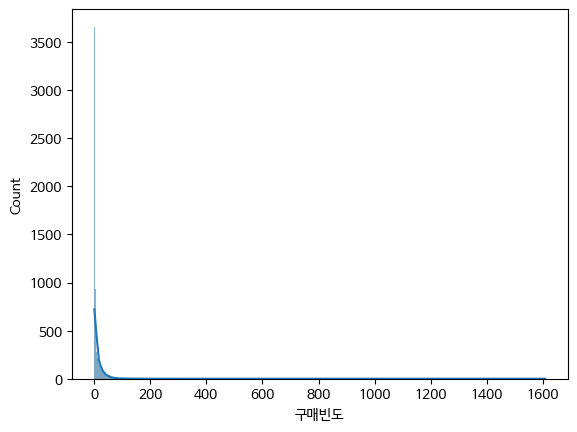

In [12]:
sns.histplot(data=df_fruit_pivot_table, x = '구매빈도', kde=True)

In [13]:
# stats.anderson을 사용한 정규 분포 검정
result = stats.anderson(df_fruit_pivot_table['구매빈도'])
print('Test Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('%.1f%% 수준에서 데이터는 정규 분포를 따름 (검정 통계량 %.3f < 임계값 %.3f)' % (sl, result.statistic, cv))
    else:
        print('%.1f%% 수준에서 데이터는 정규 분포를 따르지 않음 (검정 통계량 %.3f >= 임계값 %.3f)' % (sl, result.statistic, cv))

Test Statistic: 1370.055
15.0% 수준에서 데이터는 정규 분포를 따르지 않음 (검정 통계량 1370.055 >= 임계값 0.576)
10.0% 수준에서 데이터는 정규 분포를 따르지 않음 (검정 통계량 1370.055 >= 임계값 0.656)
5.0% 수준에서 데이터는 정규 분포를 따르지 않음 (검정 통계량 1370.055 >= 임계값 0.787)
2.5% 수준에서 데이터는 정규 분포를 따르지 않음 (검정 통계량 1370.055 >= 임계값 0.918)
1.0% 수준에서 데이터는 정규 분포를 따르지 않음 (검정 통계량 1370.055 >= 임계값 1.092)


## 연속형 데이터가 비정규 분포이고, 범주형 집단이 3개 이상 : Kruskal Test

In [14]:
# 필요 항목 확인
age_list = df_fruit_pivot_table['연령대'].value_counts().index.to_list()
age_list

['40대', '50대', '30대이하', '60대', '70대이상']

In [15]:
series_list = list()
for age in age_list:
  condition = f"연령대 == '{age}'"
  series_frequency = df_fruit_pivot_table.query(condition)['구매빈도'] # condition에 따른 amount series 작성
  series_list.append(series_frequency)
  print(series_frequency.isnull().sum())
# series_list

0
0
0
0
0


In [17]:
# stats.kruskal(series_list[0],series_list[4])
stats.kruskal(*series_list)

KruskalResult(statistic=108.8389380880559, pvalue=1.2870257814832572e-22)

In [18]:
round(1.2870257814832572e-22,6)

0.0

## 분석 결과
- 통계 결론 : 대립 가설 성립
- 사실 결론 : 연령대에 따른 고객의 구매 빈도의 차이가 있다.